In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
data_train = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\Support Vector Machines\\SalaryData_Train.csv")
data_train.head()
# data_train.describe()
# data_train.columns

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# check for Null values
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [4]:
data_test = pd.read_csv("C:\\Users\\Swathi\\Desktop\\Excelr Classes\\Assignments\\Support Vector Machines\\SalaryData_Test.csv")
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
# check for Null values
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Identify all the categorical columns

In [6]:
objList_train = data_train.select_dtypes(include = "object").columns
print (objList_train)

objList_test = data_test.select_dtypes(include = "object").columns
print (objList_test)


Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')
Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')


# Using LabelEncoder convert all categorical values to numerical

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList_train:
    data_train[feat] = le.fit_transform(data_train[feat].astype(str))

# print (data_train)
data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList_test:
    data_test[feat] = le.fit_transform(data_test[feat].astype(str))

# print (data_train)
data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


# Normalize data

In [9]:
def norm_func(i):
    r = ( i - i.min()) / ( i.max() - i.min())
    return(r)

n_data_train = norm_func(data_train.iloc[:,:])
n_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564,0.0


In [10]:
n_data_test = norm_func(data_test.iloc[:,:])
n_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718,0.0


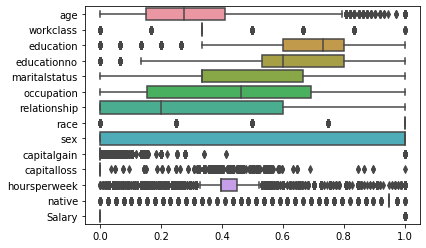

In [11]:
# box plot to check for outliers
sns.boxplot(data=n_data_train,orient="h")

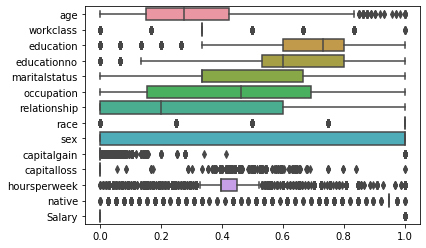

In [12]:
# box plot to check for outliers
sns.boxplot(data=n_data_test,orient="h")

# Checking for class immbalance problem

In [13]:
n_data_train.Salary.value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

In [14]:
n_data_test.Salary.value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

Clearly there is a case of class immbalance problem.
we can either under sample or perform over sampling methods

# Treating Class Imbalance Problem

1. Under sampling

In [15]:
from sklearn.utils import resample

#Train Data
data_majority_train = n_data_train[n_data_train.Salary == 0.0]
data_minority_train = n_data_train[n_data_train.Salary == 1.0]

print (data_majority_train.Salary.value_counts())
print (data_minority_train.Salary.value_counts())

#Test Data
data_majority_test = n_data_test[n_data_test.Salary == 0.0]
data_minority_test = n_data_test[n_data_test.Salary == 1.0]

print (data_majority_test.Salary.value_counts())
print (data_minority_test.Salary.value_counts())

0.0    22653
Name: Salary, dtype: int64
1.0    7508
Name: Salary, dtype: int64
0.0    11360
Name: Salary, dtype: int64
1.0    3700
Name: Salary, dtype: int64


In [16]:
# Downsampling Majority Class - Train data set
majority_down_train = resample(data_majority_train, replace=False,
                                   n_samples=8000, random_state=123)

print (majority_down_train.shape)

data_down_sample_train = pd.concat([majority_down_train,data_minority_train])

print (data_down_sample_train.Salary.value_counts())


# Downsampling Majority Class - Train data set
majority_down_test = resample(data_majority_test, replace=False,
                                   n_samples=4000, random_state=125)

print (majority_down_test.shape)

data_down_sample_test = pd.concat([majority_down_test,data_minority_test])

print (data_down_sample_test.Salary.value_counts())

(8000, 14)
0.0    8000
1.0    7508
Name: Salary, dtype: int64
(4000, 14)
0.0    4000
1.0    3700
Name: Salary, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X1 = data_down_sample_train.drop(['Salary'],axis=1) 
Y1 = data_down_sample_train['Salary']

X2 = data_down_sample_test.drop(['Salary'],axis=1) 
Y2 = data_down_sample_test['Salary'] 

# Create SVM classification object 


# 1. kernel = Linear

In [18]:
from sklearn.svm import SVC
# help(SVC)
model_linear = SVC(kernel = "linear")
model_linear.fit(X1,Y1)
pred_test_linear = model_linear.predict(X2)

np.mean(pred_test_linear==Y2) # Accuracy = 75.81

0.7581818181818182

# 2. Kernel = poly

In [19]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X1,Y1)
pred_test_poly = model_poly.predict(X2)

np.mean(pred_test_poly==Y2) # Accuracy = 81.28

0.8128571428571428

# 3. kernel = rbf

In [20]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X1,Y1)
pred_test_rbf = model_rbf.predict(X2)

np.mean(pred_test_rbf==Y2) # Accuracy = 80.85

0.8085714285714286

# Treating Class Imbalance Problem

2. Over sampling

In [21]:
# Code for Oversampling

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X3 = n_data_train.iloc[:,0:13]
Y3 = n_data_train['Salary']

# print(X3)
# print("\n",Y3)

X4 = n_data_test.iloc[:,0:13]
Y4 = n_data_test['Salary']

# print(X4)
# print("\n",Y4)

In [22]:
#  Oversampling Technique :SMOTE - Synthetic Minority Oversampling Technique

from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(random_state=0)
x_smote_train, y_smote_train = smote.fit_resample(X3, Y3)
pd.Series(y_smote_train).value_counts()

print (pd.Series(y_smote_train).value_counts())

X3 = x_smote_train
Y3 = y_smote_train

x_smote_test, y_smote_test = smote.fit_resample(X4, Y4)
pd.Series(y_smote_test).value_counts()

print (pd.Series(y_smote_test).value_counts())

X4 = x_smote_test
Y4 = y_smote_test

1.0    22653
0.0    22653
Name: Salary, dtype: int64
1.0    11360
0.0    11360
Name: Salary, dtype: int64


# Create SVM classification object 

# 1. kernel = Linear

In [23]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X3,Y3)
pred_test_linear = model_linear.predict(X4)

np.mean(pred_test_linear==Y4) # Accuracy = 76.23

0.7623679577464789

# 2. Kernel = poly

In [24]:
model_poly = SVC(kernel = "poly")
model_poly.fit(X3,Y3)
pred_test_poly = model_poly.predict(X4)

np.mean(pred_test_poly==Y4) # Accuracy = 81.83

0.8183098591549296

# 3. kernel = rbf

In [25]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X3,Y3)
pred_test_rbf = model_rbf.predict(X4)

np.mean(pred_test_rbf==Y4) # Accuracy = 81.54

0.8154489436619718